# Invatare nesupervizata si preprocesare (2)

## Clustering

Scop:  partitionarea datelor in grupuri. Ideal, clusterele ar trebui sa aiba urmatoarele proprietati: punctele dintr-un cluster oarecare ar trebui sa fie similare, punctele din clustere diferite sa fie foarte diferite. Pentru un punct nou dat trebuie determinat clusterul de care apartine. In functie de varianta de algoritm de clustering, se poate ca un punct nou sa fie de asemenea considerat "outlier" (nu se potriveste cu niciun cluster) sau poate avea diverse grade de apartenenta la clusterele rezultate - de ex. in fuzzy c-means. 

Exista multiple variante de clustering, fiecare mergand pe strategie specifica. Rezultatele pentru un acelasi set de date peste care se aplica diferiti algoritmi de clustering sunt date mai jos:
![rulari clustering](./images/rulari_clustering.png)

### k-means clustering

Algoritmul este dat in [Cursul de IA](https://github.com/lmsasu/cursuri/blob/master/InteligentaArtificiala/curs/InteligentaArtificiala.pdf), sectiunea 8.4. k-means propune centri de cluster care sa minimizeze valoarea functiei:
$$
\sum_{i=1}^{n}\min_{\mu_j \in C}\|x_i - \mu_j\|^2
$$

Evolutia pasilor de clustering pentru un set de date este aratata in imaginea urmatoare:
![evolutie clustering](./images/kmeans-evolution.png)
Sursa: Introduction to machine learning with Python

Fiecare cluster astfel realizat are asignata o intreaga zona de influenta: orice punct din spatiu apartine de clusterul in zona caruia se gaseste:
![arie de influenta](./images/kmeans-area.png)
Sursa: Introduction to machine learning with Python

Zonele de influenta sunt configurate in functie de metrica folosita. Cea mai populara metrica este cea Euclidiana, un caz particular al [divergentei Bregman](http://www.jmlr.org/papers/volume6/banerjee05b/banerjee05b.pdf). 

Utilizare de implementare sklearn:

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Cei 3 centroizi sunt determinati cu:

In [3]:
kmeans.cluster_centers_

array([[ -6.582,  -8.172],
       [ -1.471,   4.337],
       [-10.049,  -3.86 ]])

Pentru un set de date, putem cere determinarea indicilor de cluster de care apartine fiecare punct din set prin metoda `predict`:

In [4]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Apartenenta se decide, desigur, pe baza celui mai apropiat centroid de cluster.

Etichetele 0-2 sunt arbitrare, o rerulare a algoritmului poate duce la ordine diferita a etichetelor in vectorii de mai sus. Reprezentarea datelor impreuna cu centrii clusterelor (triunghiuri) este data mai jos:

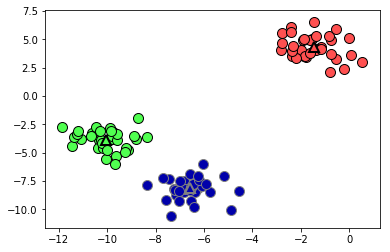

In [5]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

Numarul de clustere k este dictat de catre utilizator. Algoritmul functioneaza cu un spectru larg de valori $k$:

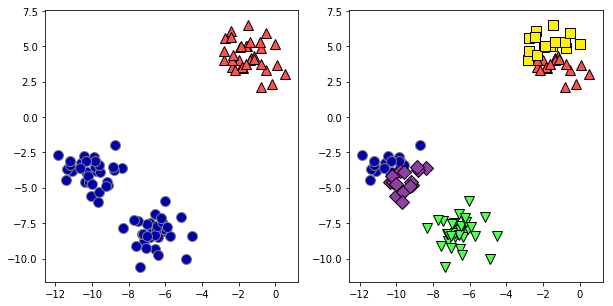

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Elementele de critica pentru algoritmul k-means sunt::
1. alegerea incorecta a numarului $k$ de centroizi nu se semnalata de catre algorim in niciun fel
1. clusterele sunt forme convexe (globulare), ceea ce nu se potriveste bine cu cazurile in care grupurile de date sunt elongate sau neconvexe
1. clusterele tind sa aiba acelasi diametru
1. pot rezulta clustere fara reprezentanti, daca centroizii se indeparteaza prea mult (rar, dar posibil)
1. suprafetele de separare sunt la mijlocul distantei dintre centroizi. 

Pentru punctul 2 de mai sus avem exemplificare:

Text(0, 0.5, 'Feature 1')

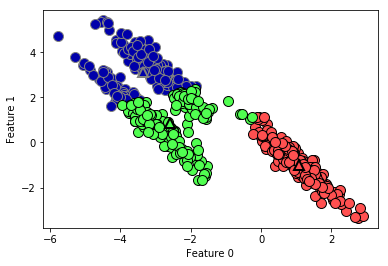

In [7]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Pentru suprafete mai complicate, tendintele k-means sunt si mai clare. Iata comportamentul pentru 2 forme de semiluna:

Text(0, 0.5, 'Feature 1')

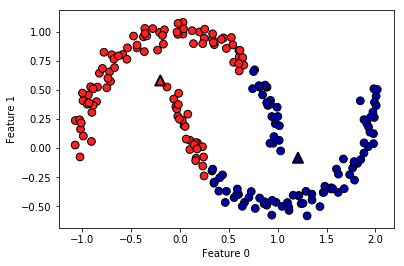

In [8]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Legat de suprafetele de separare, avem demo-ul de mai jos:

Text(0, 0.5, 'Feature 1')

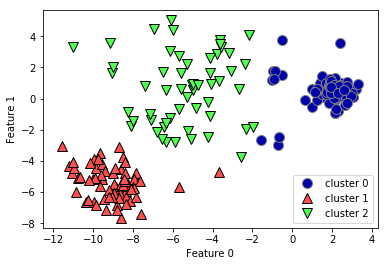

In [9]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Pentru clusterele 0 si 1, datele aflate mai spre centrul figurii ar fi fost mai degraba vazute ca parte din clutserul 2. Mediatoarele segmentelor determinate de cei 3 centroizi dicteaza insa la cine se face apartenenta. 

Distanta (metrica) folosita are de asemenea impact asupra rezultatului clustering-ului. Daca se foloseste distanta Minkowski:
$$
d(\mathbf{a}, \mathbf{b}) = \left( \sum\limits_{i=1}^d |a_i - b_i|^p \right)^{\frac{1}{p}}
$$
atunci in mod necesar trasaturile trebuie sa fie pe aceeasi scala. In acest caz, distanta arata ca fiecare trasatura are aceasi importanta in calculul distantei. O abordare diferita este folosirea de metrici care sa fie invatate, pe baza unui semnal critic; domeniul se numeste **metric learning** si este o arie de cercetare activa:
* [A Tutorial on Distance Metric Learning: Mathematical Foundations, Algorithms and Software](https://arxiv.org/abs/1812.05944)
* [Distance metric learning, with application to clustering with side-information](https://ai.stanford.edu/~ang/papers/nips02-metric.pdf)
* [A Survey on Metric Learning for Feature Vectors and Structured Dat](https://arxiv.org/abs/1306.6709)

Alte comentarii pentru k-means:
1. algoritmul este rapid in practica, dar nu garanteaza determinarea centroizilor optimali;
1. se poate face rularea repetata a algoritmului k-means cu diverse intiializari ale centroizilor si apoi alegerea variantei care minimizeaza functia fata la inceputul notebook-ului:
$$
\sum_{i=1}^{n}\min_{\mu_j \in C}\|x_i - \mu_j\|^2
$$
aceasta fiind varianta folosita in sklearn
1. alternativ, se poate folosi algoritmul k-means++ pentru initializarea centroizilor: [k-means++: The Advantages of Careful Seeding](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)
1. alternativ, se poate folosi algoritm care estimeaza numarul de clustere: [X-means: Extending K-means with Efficient Estimation of the Number of Clusters](https://www.cs.cmu.edu/~dpelleg/download/xmeans.pdf)
1. alternativ: se poate folosi [metoda siluetelor](https://en.wikipedia.org/wiki/Silhouette_(clustering))

### Clustering ierarhic aglomerativ

Clusteringul aglomerativ pleaca de la ideea ca initial fiecare punct din setul de date este un cluster; succesiv, clusterele apropiate se unsesc si formeaza clustere mai mari; daca aglomerarea de clustere continua, atunci se poate ajunge la un singur cluster care contine toate datele; de regula, procesul este oprit atunci cand se ajunge la un anumit numar de clustere.

![clustering ierarhic](./images/ierarhic_1.png)

Modalitatile de masurare a similaritatii clusterelor se bazeaza pe un criteriu de legatura - *linkage*. Variante:
* Metoda lui Ward - se face alegerea clusterelor care se vor uni de asa maniera incat cresterea variantei in interiorul clusterelor sa fie minima
* average - se unesc cele 2 clustere care minimizeaza distanta medie intre perechile de puncte ce apartin de aceste clustere 
![average](./images/ierarhic-average.png)
* complete - uneste acele clustere pentru care distanta maxima dintre perechi de puncte este de valoare minima

Comparatie:
![ierahic comparatie](./images/ierarhic_comparatie.png)

In practica metoda lui Ward da rezultate bune. Pasii pentru un set de date sunt exemplificati in figura de mai jos:
![pasi](./images/agglomerative_steps.png)

Exemplu de utilizare in sklearn:

Text(0, 0.5, 'Feature 1')

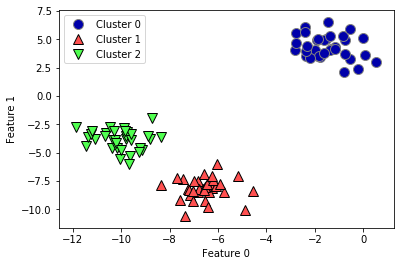

In [10]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Exista o posibilitate de a cum decurge procesul de clustering aglomerativ, folosind un arbore (o dendrograma) ce arata in ce ordine se fac unirile de clustere. Metoda are avantajul ca se poate aplica pentru date in oricate dimensiuni; importanta este doar referirea la datele initiale, pentru a arata in ce ordine se face aglomerarea lor. 

Text(0, 0.5, 'Cluster distance')

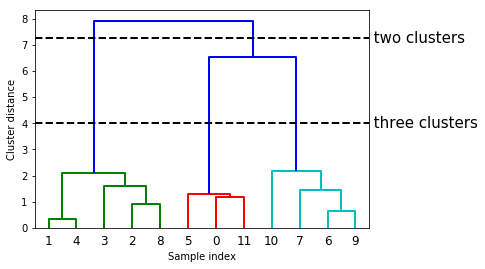

In [11]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### DBSCAN

Algoritmul DBSCAN (density based spatial clustering of applications with noise) este creatia lui Hans-Peter Kriegel si a altor colaboratori. Algoritmul a trecut "testul timpului", iar autorul principal a fost recompensat cu [2014 SIGKDD TEST OF TIME AWARD](https://www.kdd.org/News/view/2014-sigkdd-test-of-time-award). 

Punctele din setul de date sunt vazute astfel (sursa: Wikipedia)
* A point p is a core point if at least minPts points are within distance ε of it (including p).
* A point q is directly reachable from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.
* A point q is reachable from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that all points on the path must be core points, with the possible exception of q.
* All points not reachable from any other point are outliers or noise points.

Exemplu:
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/800px-DBSCAN-Illustration.svg.png' />
In imaginea de mai sus: minPts = 4, punctele rosii sunt core points, B si C nu sunt core points dar pot fi ajunse din A; punctele galbene si rosii apartin de acelasi cluster. Punctul N este zgomot - nu face parte din cluster.

Algoritm: 
![algoritm](./images/algorithm_dbscan.png)

Parametrii *eps* si *minPts* determina comportamentul algoritmului. 

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


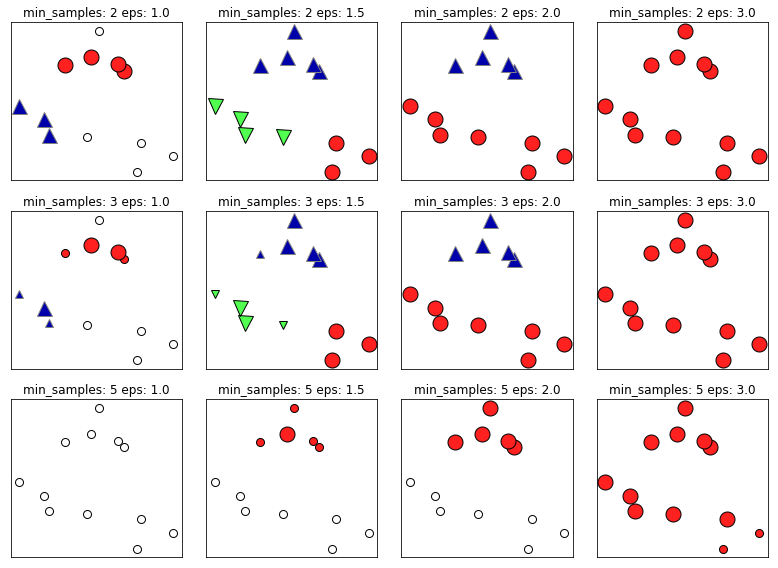

In [12]:
mglearn.plots.plot_dbscan()

Desi mai lent decat k-means, nu necesita precizarea unui numar de clustere. In plus, suprafetele de separare pot fi neliniare, iar clusterele ne-globulare si de dimensiuni diferite:

Text(0, 0.5, 'Feature 1')

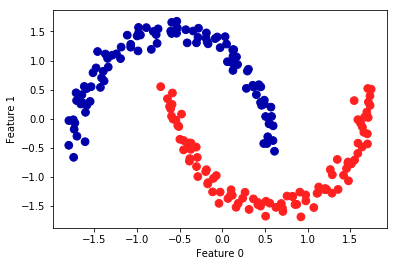

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Despre efectul parametrilor $minPts$ si $eps$:
1. daca eps se seteaza la valoare prea mica, atunci niciun punct nu va fi core point si toate datele vor fi etichetate ca zgomot
1. daca eps se seteaza la o valoare prea mare, se va forma un singur cluster 
1. daca minPts se seteaza la o valoare prea mare, exista riscul ca multe puncte sa fie declarate ca zgomot